# DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

## 가설 1 : 학습 성취도가 90% 이상인 유저들이 재구독할 가능성이 높을 것이다

### 1.1 데이터 탐색

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns

user_data = pd.read_csv('data/mini.csv')

user_data.info()
user_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,26.998490,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,10.000000,7.000000,1.000000


In [7]:
user_data.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


In [9]:
user_data.shape

(10000, 15)

In [ ]:
# 총 10000행과 15열을 가진 데이터다.

### 1.2 결측치 확인 및 처리

In [38]:
user_data.isnull().sum()

user_id                              0
subscription_duration                0
recent_login_time                    0
average_login_time                   0
average_time_per_learning_session    0
monthly_active_learning_days         0
total_completed_courses              0
recent_learning_achievement          0
abandoned_learning_sessions          0
community_engagement_level           0
preferred_difficulty_level           0
subscription_type                    0
customer_inquiry_history             0
payment_pattern                      0
target                               0
dtype: int64

In [11]:
user_data[user_data.isna().sum(axis=1) > 0]

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target


In [ ]:
# 결측치는 없는 것으로 보인다.

### 1.3 데이터 전처리

In [14]:
user_data['subscription_type'].unique()

array(['Basic', 'Premium'], dtype=object)

In [15]:
user_data['payment_pattern'].unique()

array([5, 6, 7, 0, 1, 3, 4, 2], dtype=int64)

In [ ]:
# 성취도 별 수강생 분포도를 알아보자

In [ ]:
# 최근 학습 성취도를 기준으로 데이터프레임 만들기

In [49]:
df = pd.DataFrame(user_data, columns=['recent_learning_achievement','payment_pattern'])
df.head()

,recent_learning_achievement,payment_pattern
0,68.360455,5
1,97.567322,6
2,94.358763,7
3,70.153228,0
4,81.917908,0


In [ ]:
# groupby로 집계하기 전에 column 추가 생성하기
# 각 성취도가 포함된 범위값을 column(percent)으로 추가하여 구한다.

In [50]:
df['percent'] = 0 

In [51]:
def find_group(recent_learning_achievement):
    groups = [ 60, 70, 80, 90, 100]
    for i in range(len(groups)):
        if recent_learning_achievement < groups[i]:
            if i == 0:
                return 0
            
            return groups[i-1]

In [52]:
df['percent'] = [find_group(e) for e in df.recent_learning_achievement]

In [53]:
df.groupby('percent').count()

,recent_learning_achievement,payment_pattern
percent,,
0.0,675,675
60.0,2396,2396
70.0,3823,3823
80.0,2456,2456
90.0,592,592


In [60]:
df[['percent', 'payment_pattern']].groupby('percent').count().sort_values('payment_pattern')

,payment_pattern
percent,
90.0,592
0.0,675
60.0,2396
80.0,2456
70.0,3823


In [ ]:
# 가장 분포도가 많은 성취율은 70%이며, 90%이상 학습한 유저는 9,942명 중에서 592명으로 약 17%를 차지한다.

In [90]:
user_data['achievement_bins_10'] = pd.cut(user_data['recent_learning_achievement'], bins=range(0, 110, 10))

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 결제 패턴별로 조회하기 위해 10 단위로 성취도 범위 다시 나누기

In [97]:
bins = range(0, 110, 10)
labels = [f'{i}-{i+9}' for i in bins[:-1]]

In [ ]:
# 'achievement_range'라는 새로운 열 생성하기

In [106]:
user_data['achievement_range'] = pd.cut(user_data['recent_learning_achievement'], bins=bins, labels=labels, right=False)

In [ ]:
# 'achievement_range'와 'payment_pattern'으로 그룹화하여 개수 세기

In [111]:
import warnings
warnings.filterwarnings(action='ignore')

user_achievement_payment_distribution = user_data.groupby(['achievement_range', 'payment_pattern']).size().unstack(fill_value=0)
user_achievement_payment_distribution

payment_pattern,0,1,2,3,4,5,6,7
achievement_range,,,,,,,,
0-9,0,0,0,0,0,0,0,0
10-19,0,0,0,0,0,0,0,0
20-29,0,0,0,0,0,0,0,0
30-39,0,0,1,0,0,1,1,0
40-49,5,6,5,6,7,11,9,7
50-59,74,81,67,84,76,83,76,75
60-69,321,286,280,321,289,289,301,309
70-79,480,523,464,460,458,445,496,497
80-89,323,315,289,281,306,333,307,302


In [ ]:
# 이번에는 성취도를 상위, 중간, 하위 그룹으로 나누어 결제 패턴을 확인해보고자 한다.

In [168]:
user_data['achievement_group'] = pd.qcut(user_data['recent_learning_achievement'], q=3, labels=['Low', 'Medium', 'High'])

In [172]:
payment_pattern_distribution = user_data.groupby(['achievement_group', 'payment_pattern']).size().unstack().fillna(0)
payment_pattern_distribution

payment_pattern,0,1,2,3,4,5,6,7
achievement_group,,,,,,,,
Low,436,404,380,450,407,413,423,421
Medium,419,456,410,392,400,389,434,433
High,420,425,416,388,407,436,411,430


In [ ]:
# Chi-square 테스트? (이건 chat-gpt 선생님의 도움을 받았다)

In [175]:
import scipy.stats as stats
chi2, p, dof, ex = stats.chi2_contingency(payment_pattern_distribution)
print(f"Chi-square test statistic: {chi2}")
print(f"p-value: {p}")

Chi-square test statistic: 14.91275323111561
p-value: 0.384144696436559


In [176]:
if p < 0.05:
    print("결제 패턴에 성과 그룹 간에 유의한 차이가 있습니다.")
else:
    print("결제 패턴에 성과 그룹 간에 유의한 차이가 없습니다.")

결제 패턴에 성과 그룹 간에 유의한 차이가 없습니다.


In [ ]:
# 이름부터 심상치 않은 카이제곱 검증... 두 범주형 변수에 대한 분석 방법이란다. 어쨋든 앞서 내가 확인한 것과 크게 다르지 않는 것으로...

In [ ]:
# 추가로 각 그룹별 선호하는 난이도를 알아보자

In [153]:
difficulty_distribution = user_data.groupby(['achievement_range', 'preferred_difficulty_level']).size().unstack(fill_value=0)
difficulty_distribution

preferred_difficulty_level,High,Low,Medium
achievement_range,,,
0-9,0,0,0
10-19,0,0,0
20-29,0,0,0
30-39,0,2,1
40-49,10,28,18
50-59,122,292,202
60-69,480,1194,722
70-79,774,1914,1135
80-89,470,1233,753


### 1.4 데이터 시각화

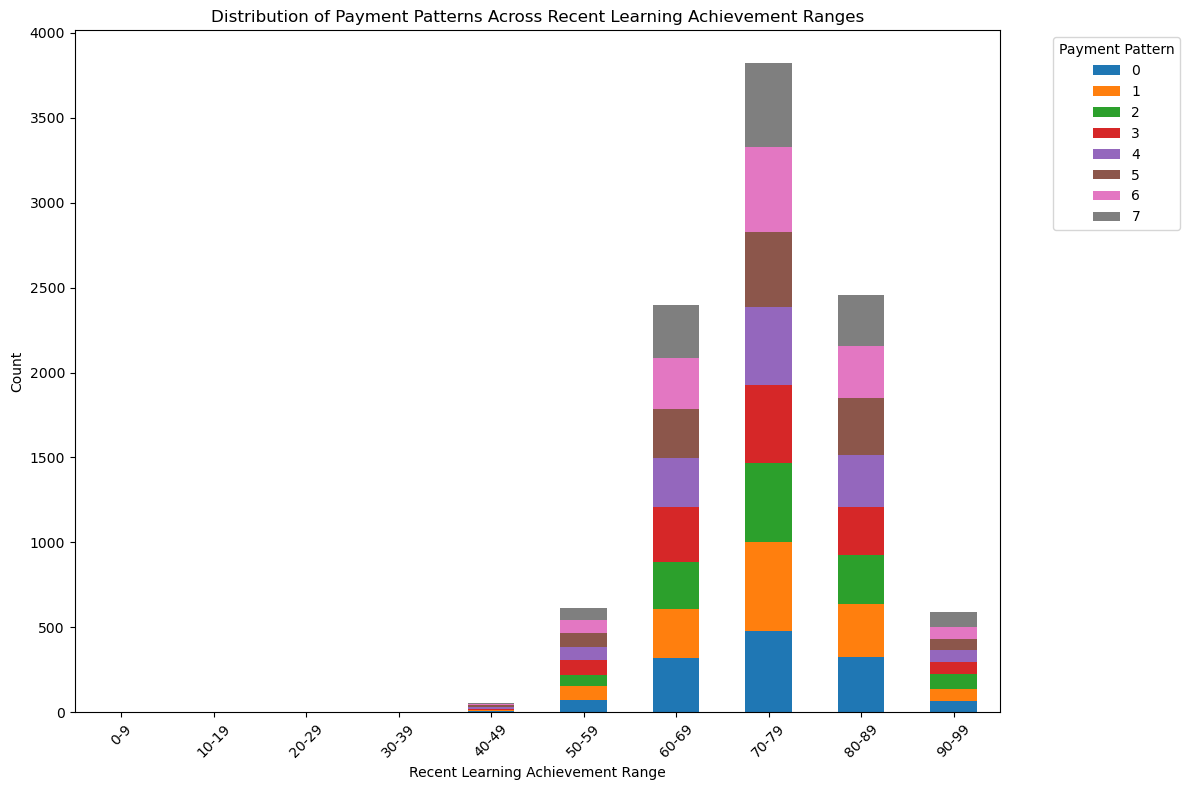

In [114]:
user_achievement_payment_distribution.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of Payment Patterns Across Recent Learning Achievement Ranges')
plt.xlabel('Recent Learning Achievement Range')
plt.ylabel('Count')
plt.legend(title='Payment Pattern', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

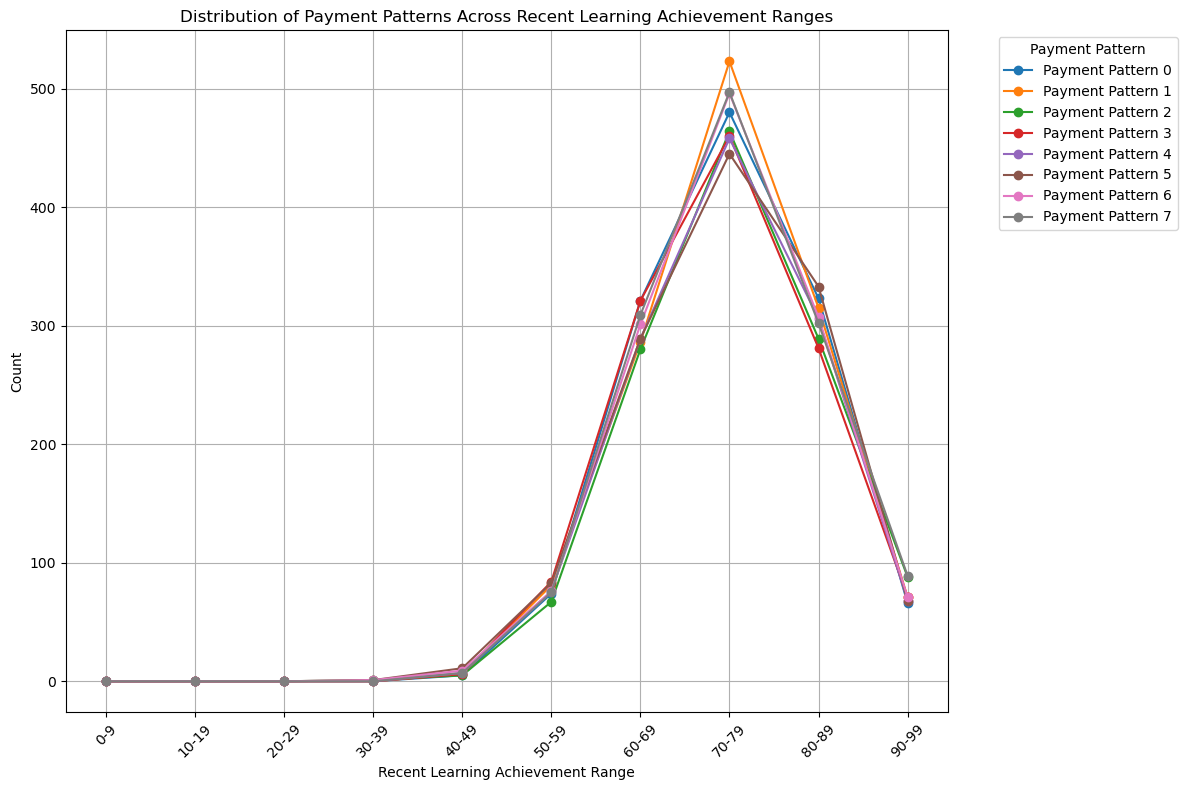

In [116]:
plt.figure(figsize=(12, 8))
for column in user_achievement_payment_distribution.columns:
    plt.plot(user_achievement_payment_distribution.index, user_achievement_payment_distribution[column], marker='o', label=f'Payment Pattern {column}')

plt.title('Distribution of Payment Patterns Across Recent Learning Achievement Ranges')
plt.xlabel('Recent Learning Achievement Range')
plt.ylabel('Count')
plt.legend(title='Payment Pattern', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


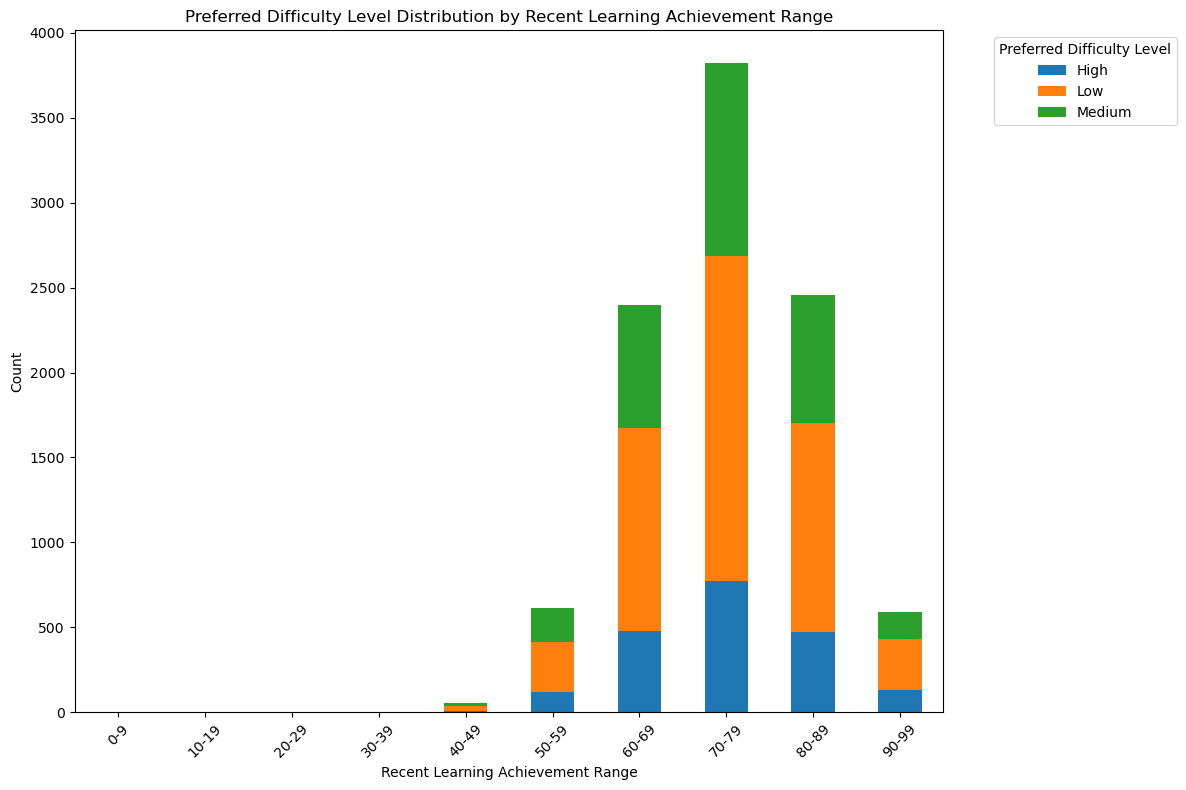

In [154]:
difficulty_distribution.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Preferred Difficulty Level Distribution by Recent Learning Achievement Range')
plt.xlabel('Recent Learning Achievement Range')
plt.ylabel('Count')
plt.legend(title='Preferred Difficulty Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
# 3개월 이상 결제한 유저의 최근 학습 성취도는 70% 이상이 제일 많았다. 따라서 70% 이상 학습한 유저들의 재구독이 높을 것으로 보인다.
# 전반적으로 선호하는 난이도가 'low'인것을 보아, 수강룰 70% 이상 달성시 새로운 강의(쉬운 난이도)를 할인받아 결제할 수 있는 프로모션을 진행하면 어떨끼?

## 가설 2 : 주 4회 이상 학습한 유저들이 재구독 가능성이 높을 것이다.

### 2.1 데이터 탐색 및 결측치 처리(생략)

### 2.2 데이터 전처리

In [ ]:
# 월(30일) 데이터에서 7일 단위로 범위를 나누기

In [140]:
bins = range(0, 29, 7)  # 간단하게 보기 위해 임의로 월 일수를 28일로 설정
labels = [f'Week {i//7 + 1}' for i in bins[:-1]]

In [ ]:
# 'week_range'라는 새로운 열(주) 생성하기

In [141]:
user_data['week_range'] = pd.cut(user_data['monthly_active_learning_days'], bins=bins, labels=labels, right=False)

In [ ]:
# 주 4회 이상 학습한 유저와 그렇지 않은 유저를 구분하는 새로운 열 생성

In [142]:
user_data['active_weekly'] = user_data['monthly_active_learning_days'] >= 16  # 주 4회 학습은 월 16회 이상 학습

In [ ]:
# 유저 그룹 생성하기

In [143]:
active_users = user_data[user_data['active_weekly']]
inactive_users = user_data[~user_data['active_weekly']]

In [ ]:
# 그룹별 결제 비율은?

In [144]:
active_repayment_rate = (active_users['payment_pattern'] > 0).mean()
inactive_repayment_rate = (inactive_users['payment_pattern'] > 0).mean()

In [145]:
print(f"주 4회 이상 학습한 사용자의 결제 비율: {active_repayment_rate:.2%}")
print(f"주 4회 이하 학습한 사용자의 결제 비율: {inactive_repayment_rate:.2%}")

주 4회 이상 학습한 사용자의 결제 비율: 86.70%
주 4회 이하 학습한 사용자의 결제 비율: 87.58%


In [ ]:
# 그룹별 구독 유형은 어떻게 될까?

In [149]:
active_subscription_distribution = active_users['subscription_type'].value_counts(normalize=True)
inactive_subscription_distribution = inactive_users['subscription_type'].value_counts(normalize=True)

In [150]:
print("주 4회 이상 학습한 사용자의 subscription_type 분포:")
print(active_subscription_distribution)
print("\n주 4회 이하 학습한 사용자의 subscription_type 분포:")
print(inactive_subscription_distribution)

주 4회 이상 학습한 사용자의 subscription_type 분포:
subscription_type
Basic      0.603604
Premium    0.396396
Name: proportion, dtype: float64

주 4회 이하 학습한 사용자의 subscription_type 분포:
subscription_type
Basic      0.594443
Premium    0.405557
Name: proportion, dtype: float64


### 2.3 데이터 시각화

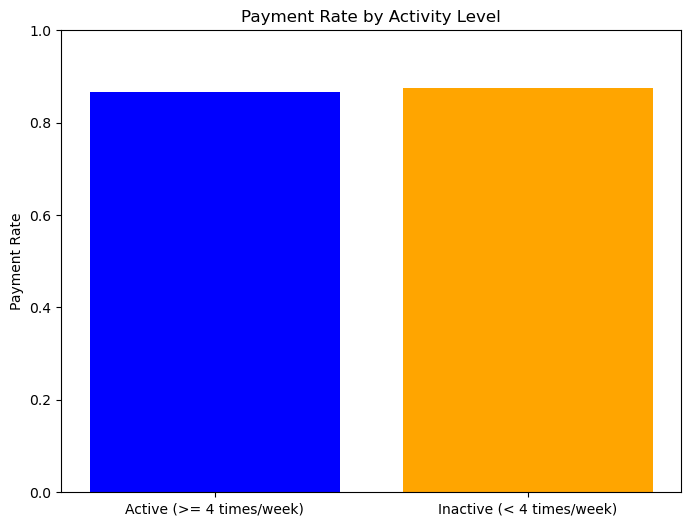

In [146]:
categories = ['Active (>= 4 times/week)', 'Inactive (< 4 times/week)']
rates = [active_repayment_rate, inactive_repayment_rate]

plt.figure(figsize=(8, 6))
plt.bar(categories, rates, color=['blue', 'orange'])
plt.ylabel('Payment Rate')
plt.title('Payment Rate by Activity Level')
plt.ylim(0, 1)
plt.show()

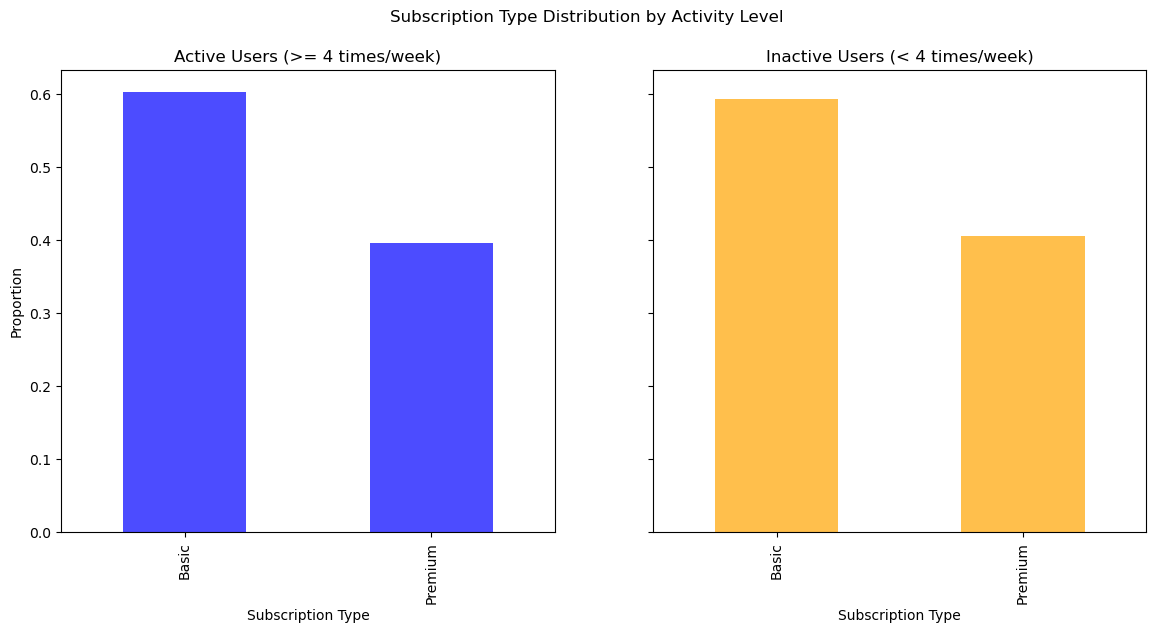

In [151]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

active_subscription_distribution.plot(kind='bar', ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('Active Users (>= 4 times/week)')
axes[0].set_xlabel('Subscription Type')
axes[0].set_ylabel('Proportion')

inactive_subscription_distribution.plot(kind='bar', ax=axes[1], color='orange', alpha=0.7)
axes[1].set_title('Inactive Users (< 4 times/week)')
axes[1].set_xlabel('Subscription Type')

plt.suptitle('Subscription Type Distribution by Activity Level')
plt.show()

In [ ]:
# 학습 일수는 크게 영향을 끼치지 않나보다 .. 
# 유저 전반적으로 'Basic'을 구독하는 경향이 있는데, 신규 유저를 대상으로 'Basic' 3개월 결제시 'Premium'을 1개월 체험할 수 있는 프로모션을 진행하면 어떨까?

## 가설 3 : 지속적으로 결제한 유저들이 재구독할 가능성이 높을 것이다.

### 3.1 데이터 탐색 및 결측치 처리(생략)

### 3.2 데이터 전처리

In [ ]:
# 3개월 이상 결제한 유저 그룹과 그렇지 않은 유저 그룹으로 구분하기

In [156]:
payment_7_users = user_data[user_data['payment_pattern'] == 7]
other_users = user_data[user_data['payment_pattern'] != 7]

In [ ]:
# 각 그룹에서 재결제 가능성의 비율 계산 (target)

In [157]:
payment_7_repayment_rate = payment_7_users['target'].mean()
other_repayment_rate = other_users['target'].mean()

In [161]:
print(f"'payment_pattern'이 7인 유저의 재결제 가능성: {payment_7_repayment_rate:.2%}")
print(f"'payment_pattern'이 7이 아닌 유저의 재결제 가능성: {other_repayment_rate:.2%}")

'payment_pattern'이 7인 유저의 재결제 가능성: 61.92%
'payment_pattern'이 7이 아닌 유저의 재결제 가능성: 62.00%


In [ ]:
# 결제 패턴별 유저의 접속 시간과 학습 일수의 평균은 어떻게 될까?

In [167]:
payment_pattern_stats = user_data.groupby('payment_pattern')[['monthly_active_learning_days', 'average_login_time']].mean()
payment_pattern_stats.reset_index(inplace=True)
payment_pattern_stats

,payment_pattern,monthly_active_learning_days,average_login_time
0,0,12.747451,14.925603
1,1,12.713619,15.037455
2,2,12.226368,14.933905
3,3,12.390244,14.868434
4,4,12.549423,15.056146
5,5,12.543619,15.028885
6,6,12.648265,15.055349
7,7,12.521028,15.042775


### 3.3 데이터 시각화

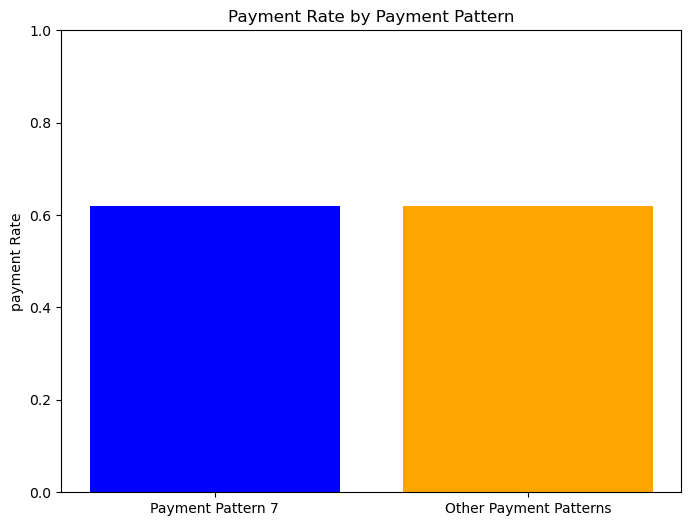

In [164]:
categories = ['Payment Pattern 7', 'Other Payment Patterns']
rates = [payment_7_repayment_rate, other_repayment_rate]

plt.figure(figsize=(8, 6))
plt.bar(categories, rates, color=['blue', 'orange'])
plt.ylabel('payment Rate')
plt.title('Payment Rate by Payment Pattern')
plt.ylim(0, 1)
plt.show()

In [ ]:
# 결제 패턴과는 크게 상관이 없나보다 ...

## 가설 4 : 커뮤니티 참여도가 높은 유저일수록 재구독할 가능성이 높을 것이다.

### 4.1 데이터 탐색 및 결측치 처리(생략)

### 4.2 데이터 전처리

In [ ]:
# 각 커뮤니티 참여도에 따라 그룹을 생성하고 결제율을 target을 사용하여 계산하기

In [177]:
purchase_rate = user_data.groupby('community_engagement_level')['target'].mean()
purchase_rate

community_engagement_level
1    0.622540
2    0.616079
3    0.609572
4    0.611111
5    0.628177
Name: target, dtype: float64

In [ ]:
# chat-gpt 선생님의 도움을 받아 테스트 및 검증하기

In [179]:
anova_result = stats.f_oneway(
    *[group['target'].values for name, group in user_data.groupby('community_engagement_level')]
)
print(f"ANOVA test statistic: {anova_result.statistic}")
print(f"p-value: {anova_result.pvalue}")

if anova_result.pvalue < 0.05:
    print("커뮤니티 참여도 그룹 간에 재결제율 차이가 유의합니다.")
else:
    print("커뮤니티 참여도 그룹 간에 재결제율 차이가 유의하지 않습니다.")

ANOVA test statistic: 0.7040025488968308
p-value: 0.5890920354458937
커뮤니티 참여도 그룹 간에 재결제율 차이가 유의하지 않습니다.


In [ ]:
# 커뮤니티 참여도도 큰 기여를 하지 않나 보다 ...

### 데이터 시각화

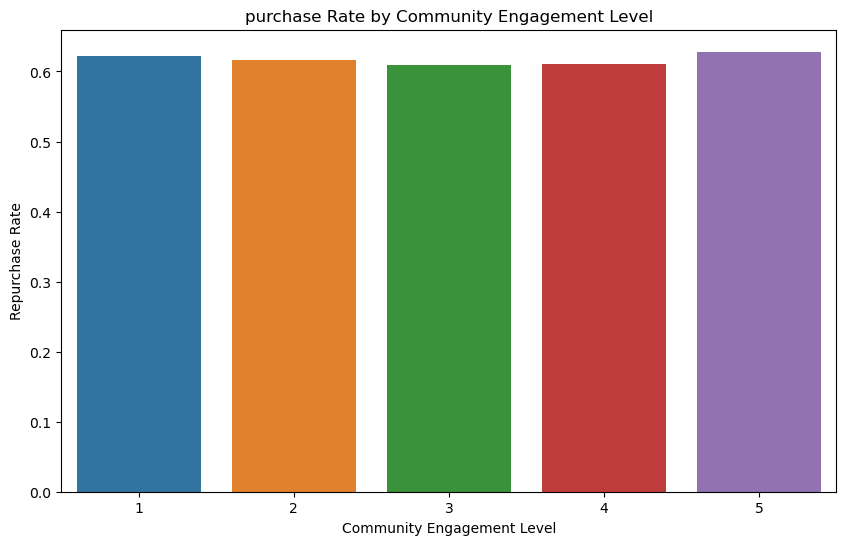

In [181]:
plt.figure(figsize=(10, 6))
sns.barplot(x=purchase_rate.index, y=purchase_rate.values)
plt.title('purchase Rate by Community Engagement Level')
plt.xlabel('Community Engagement Level')
plt.ylabel('Repurchase Rate')
plt.show()